The objectives are:

* Data Processing
* Exploratory Data Analysis
* Outlier Treatment
* Visualization
* Categorical Data Transformation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # data visualization
%matplotlib inline

In [2]:
#importing combined data: 
CBB = pd.read_csv("cbb.csv")

In [3]:
CBB.head()

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  POSTSEASON  SEED  YEAR  
0  ...  30.4  53.9  44.6  32.7  36.2   71.7   8.6         2ND   1.0  2016  
1  ...  22.4  54.8  44.7  36.5  37.5   59.3  11.3         2ND   1.0  2015  
2  ...  30.0  54.7  46.8  35.2  33.2   65.9   6.9         2ND   3.0  2018  
3  ...  36.6  52.8  41.9  36.5  29.7   67.5   7.0         2ND   3.0  2019  
4  ...  26.9  56.3  40.0  38.2  29.0   71.5   7.7         2ND   1.0  2017  

[5 rows x 24 columns]

### Variable Insights

Description of the columns TEAM: The Division I college basketball school
CONF: The Athletic Conference in which the school participates in

G: Number of games played

W: Number of games won

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

BARTHAG: Power Rating (Chance of beating an average Division I team)

EFG_O: Effective Field Goal Percentage Shot

EFG_D: Effective Field Goal Percentage Allowed

TOR: Turnover Percentage Allowed (Turnover Rate)

TORD: Turnover Percentage Committed (Steal Rate)

ORB: Offensive Rebound Percentage

DRB: Defensive Rebound Percentage

FTR : Free Throw Rate (How often the given team shoots Free Throws)

FTRD: Free Throw Rate Allowed

2P_O: Two-Point Shooting Percentage

2P_D: Two-Point Shooting Percentage Allowed

3P_O: Three-Point Shooting Percentage

3P_D: Three-Point Shooting Percentage Allowed

ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)

WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)

POSTSEASON: Round where the given team was eliminated or where their season ended

SEED: Seed in the NCAA March Madness Tournament

YEAR: Season

## Explorartory Data Analysis
### Checking the type of data types

In [4]:
CBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

We can infer that there are 3 categorical data types and rest are numerical.

In [5]:
#Checking missing value 

def missing_check(CBB):
    total = CBB.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (CBB.isnull().sum()/CBB.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(CBB)

Total   Percent
POSTSEASON   1417  0.806488
SEED         1417  0.806488
YEAR            0  0.000000
TORD            0  0.000000
CONF            0  0.000000
G               0  0.000000
W               0  0.000000
ADJOE           0  0.000000
ADJDE           0  0.000000
BARTHAG         0  0.000000
EFG_O           0  0.000000
EFG_D           0  0.000000
TOR             0  0.000000
ORB             0  0.000000
DRB             0  0.000000
FTR             0  0.000000
FTRD            0  0.000000
2P_O            0  0.000000
2P_D            0  0.000000
3P_O            0  0.000000
3P_D            0  0.000000
ADJ_T           0  0.000000
WAB             0  0.000000
TEAM            0  0.000000

There are :

* POSTSEASON with 1417 null values accounting 80.6488% as it is column for round where the given team was eliminated or where their season ended
* SEED with 1417 null values accounting 80.6488% as it is column for Seed in the NCAA March Madness Tournament

To get an insights year wise we have to convert Year wise data type into categorical ones

In [11]:
#checking for duplicated value
dupes = CBB.duplicated()
sum(dupes)

0

In [6]:
CBB["YEAR"] = pd.Categorical(CBB["YEAR"])

In [7]:
CBB.describe()

G            W        ADJOE        ADJDE      BARTHAG  \
count  1757.000000  1757.000000  1757.000000  1757.000000  1757.000000   
mean     31.523051    16.513375   103.542402   103.542459     0.493398   
std       2.602819     6.545571     7.304975     6.472676     0.255291   
min      24.000000     0.000000    76.700000    84.000000     0.007700   
25%      30.000000    12.000000    98.600000    98.900000     0.283700   
50%      31.000000    16.000000   103.100000   103.800000     0.474000   
75%      33.000000    21.000000   108.100000   108.000000     0.710600   
max      40.000000    38.000000   129.100000   124.000000     0.984200   

             EFG_O        EFG_D          TOR         TORD          ORB  \
count  1757.000000  1757.000000  1757.000000  1757.000000  1757.000000   
mean     50.120489    50.312806    18.591804    18.521286    29.277120   
std       3.130430     2.859604     1.991637     2.108968     4.101782   
min      39.400000    39.600000    12.400000    10.200000    15.000000   
25%      48.100000    48.400000    17.200000    17.100000    26.600000   
50%      50.000000    50.300000    18.500000    18.500000    29.400000   
75%      52.100000    52.300000    19.800000    19.900000    31.900000   
max      59.800000    59.500000    26.100000    28.000000    42.100000   

               DRB          FTR         FTRD         2P_O         2P_D  \
count  1757.000000  1757.000000  1757.000000  1757.000000  1757.000000   
mean     29.467445    35.097894    35.373307    49.135970    49.298065   
std       3.061786     4.884599     5.900935     3.422136     3.288265   
min      18.400000    21.600000    21.800000    37.700000    37.700000   
25%      27.300000    31.700000    31.200000    46.900000    47.100000   
50%      29.400000    34.900000    34.900000    49.000000    49.300000   
75%      31.500000    38.300000    39.200000    51.400000    51.500000   
max      40.400000    51.000000    58.500000    62.600000    61.200000   

              3P_O         3P_D        ADJ_T          WAB        SEED  
count  1757.000000  1757.000000  1757.000000  1757.000000  340.000000  
mean     34.563517    34.744792    68.422254    -7.837109    8.791176  
std       2.742323     2.369727     3.258920     6.988694    4.674090  
min      25.200000    27.100000    57.200000   -25.200000    1.000000  
25%      32.600000    33.100000    66.400000   -13.000000    5.000000  
50%      34.600000    34.700000    68.500000    -8.400000    9.000000  
75%      36.400000    36.300000    70.400000    -3.100000   13.000000  
max      44.100000    43.100000    83.400000    13.100000   16.000000

In [8]:
#checking for skewness in a data
CBB.skew()

G          0.304198
W          0.228449
ADJOE      0.250013
ADJDE     -0.033306
BARTHAG    0.154026
EFG_O     -0.026339
EFG_D     -0.040682
TOR        0.301323
TORD       0.333282
ORB       -0.034491
DRB        0.123336
FTR        0.086848
FTRD       0.439290
2P_O       0.118067
2P_D      -0.033790
3P_O       0.037810
3P_D       0.034708
ADJ_T      0.083695
WAB        0.328387
SEED      -0.063294
YEAR      -0.001614
dtype: float64

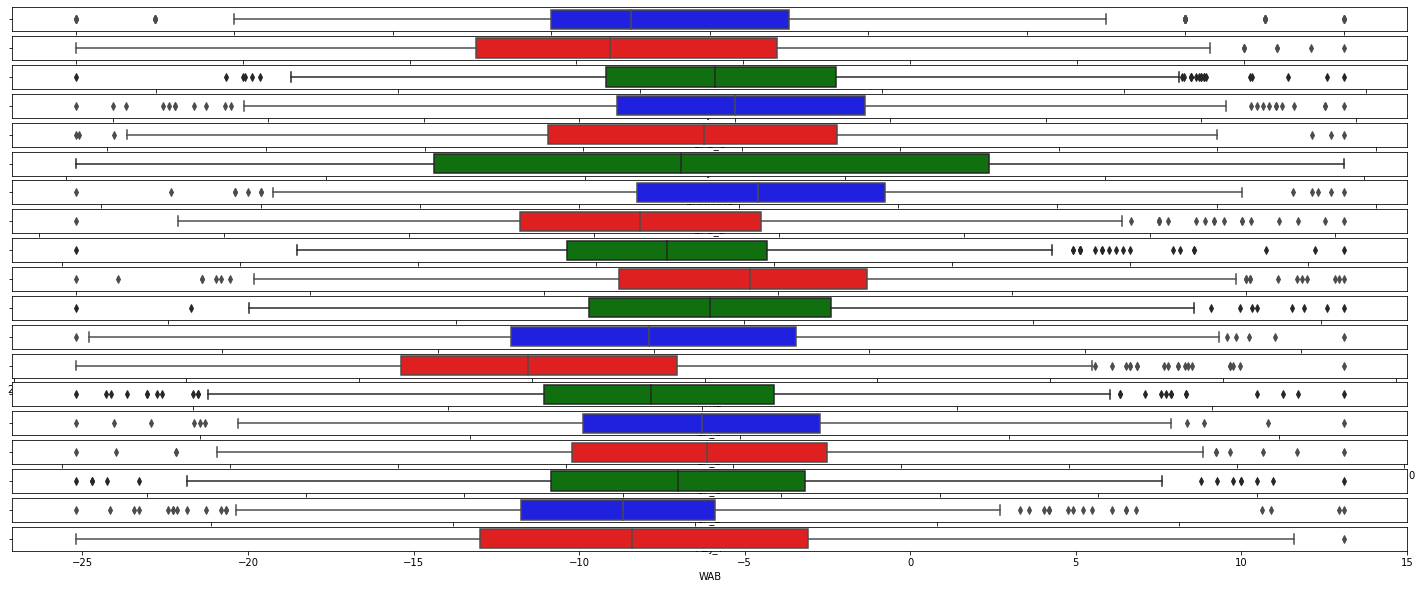

In [9]:
#cheking for outliers in a data through boxplot
plt.figure(figsize= (25,10))
plt.subplot(19,1,1)
sns.boxplot(x=CBB.G , color='blue')

plt.subplot(19,1,2)
sns.boxplot(x= CBB.W, color='red')

plt.subplot(19,1,3)
sns.boxplot(x= CBB.ADJOE, color='green')

plt.subplot(19,1,4)
sns.boxplot(x=CBB.EFG_O , color='blue')

plt.subplot(19,1,5)
sns.boxplot(x= CBB.ADJDE, color='red')

plt.subplot(19,1,6)
sns.boxplot(x= CBB.BARTHAG, color='green')

plt.subplot(19,1,7)
sns.boxplot(x=CBB.EFG_D , color='blue')

plt.subplot(19,1,8)
sns.boxplot(x= CBB.TOR, color='red')

plt.subplot(19,1,9)
sns.boxplot(x= CBB.TORD, color='green')

plt.subplot(19,1,10)
sns.boxplot(x= CBB.ORB, color='red')

plt.subplot(19,1,11)
sns.boxplot(x= CBB.DRB, color='green')

plt.subplot(19,1,12)
sns.boxplot(x=CBB.FTR , color='blue')

plt.subplot(19,1,13)
sns.boxplot(x= CBB.FTRD, color='red')

plt.subplot(19,1,14)
sns.boxplot(x= CBB['2P_O'], color='green')

plt.subplot(19,1,15)
sns.boxplot(x=CBB['2P_D'], color='blue')

plt.subplot(19,1,16)
sns.boxplot(x= CBB['3P_O'], color='red')

plt.subplot(19,1,17)
sns.boxplot(x= CBB['3P_D'], color='green')

plt.subplot(19,1,18)
sns.boxplot(x=CBB.ADJ_T , color='blue')

plt.subplot(19,1,19)
sns.boxplot(x= CBB.WAB, color='red')

plt.show()

As we can infer through above boxplots that outliers are present in all the variable.
Henceforth, outliers treatment have to be done.

In [12]:
CBB_Outlier_Treatment = CBB.drop(columns = ["TEAM", "CONF", "POSTSEASON","SEED","YEAR"])
CBB_Outlier_Treatment

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
0     40  33  123.3   94.9   0.9531   52.6   48.1  15.4  18.2  40.7  30.0   
1     40  36  129.1   93.6   0.9758   54.8   47.7  12.4  15.8  32.1  23.7   
2     40  33  114.4   90.4   0.9375   53.9   47.7  14.0  19.5  25.5  24.9   
3     38  31  115.2   85.2   0.9696   53.5   43.0  17.7  22.8  27.4  28.7   
4     39  37  117.8   86.3   0.9728   56.6   41.1  16.2  17.1  30.0  26.2   
...   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
1752  35  22  111.2   94.7   0.8640   51.4   46.9  19.2  15.3  33.9  27.3   
1753  35  28  117.9   96.6   0.9081   51.2   49.9  17.9  20.1  36.7  30.8   
1754  36  31  122.8   95.2   0.9488   55.3   48.1  15.8  18.0  31.6  30.2   
1755  35  27  117.4   94.5   0.9238   55.2   44.8  17.1  15.1  32.1  26.0   
1756  37  32  117.2   94.9   0.9192   57.0   47.1  16.1  17.4  33.0  23.1   

       FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  
0     32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6  
1     36.2  22.4  54.8  44.7  36.5  37.5   59.3  11.3  
2     30.7  30.0  54.7  46.8  35.2  33.2   65.9   6.9  
3     32.9  36.6  52.8  41.9  36.5  29.7   67.5   7.0  
4     39.0  26.9  56.3  40.0  38.2  29.0   71.5   7.7  
...    ...   ...   ...   ...   ...   ...    ...   ...  
1752  32.0  27.6  52.5  45.7  32.9  32.6   70.3   1.9  
1753  37.1  33.1  52.9  49.4  31.9  33.7   71.2   7.3  
1754  33.3  34.9  55.4  44.7  36.7  35.4   68.8   9.9  
1755  34.4  28.1  54.3  44.4  37.8  30.3   68.2   2.1  
1756  32.1  29.1  58.2  44.1  36.8  35.0   70.5   4.9  

[1757 rows x 19 columns]

In [13]:
from scipy import stats
z = np.abs(stats.zscore(CBB_Outlier_Treatment))   # get the z-score of every value with respect to their columns
print(z)

[[3.25776096 2.51946228 2.70544705 ... 0.61425725 1.00606322 2.35262669]
 [3.25776096 2.97791797 3.49965254 ... 1.16299981 2.79996183 2.73907495]
 [3.25776096 2.51946228 1.48675242 ... 0.65207174 0.7741743  2.10930742]
 ...
 [1.72052825 2.21382516 2.63698106 ... 0.27656952 0.11594446 2.53869437]
 [1.33622007 1.60255092 1.89754836 ... 1.87618976 0.06821804 1.42228829]
 [2.10483643 2.36664372 1.87016197 ... 0.10772565 0.63773822 1.82304945]]


Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [15]:
threshold = 3 # In a Normal distribution standard deviation is within or equal to 3 times
print ("Rows and columns location showing outlier value:")
np.where(z > threshold)

Rows and columns location showing outlier value:


(array([   0,    1,    1,    1,    2,    4,    4,    8,    9,    9,   29,
          37,   37,   37,   37,   37,   46,   54,   64,   73,   85,  242,
         242,  242,  348,  406,  435,  539,  545,  568,  666,  676,  682,
         769,  771,  775,  775,  779,  798,  799,  811,  815,  815,  816,
         832,  870,  872,  896,  912,  915,  921,  960,  962,  969,  973,
         981,  992, 1004, 1010, 1023, 1051, 1073, 1162, 1162, 1171, 1181,
        1193, 1237, 1243, 1244, 1247, 1270, 1280, 1286, 1286, 1296, 1337,
        1337, 1338, 1338, 1338, 1338, 1339, 1340, 1341, 1346, 1352, 1355,
        1355, 1380, 1401, 1402, 1417, 1435, 1462, 1462, 1482, 1514, 1535,
        1571, 1576, 1579, 1583, 1583, 1583, 1585, 1595, 1615, 1681, 1736,
        1736, 1739, 1748], dtype=int32),
 array([ 0,  0,  2,  7,  0,  1,  6,  0,  0,  2, 13,  1,  3,  6, 14, 16, 16,
         8,  8, 13, 13,  3,  6, 16, 16,  9, 15,  6, 17, 17,  9, 13, 12,  7,
         5,  7, 15, 10,  3, 17, 17,  5, 13,  7,  7, 15, 13, 10,  9,

In [16]:
print(z[0][0]) # for example

3.25776096109347


In [18]:
CBB_copy = CBB_Outlier_Treatment.copy()   #make a deep copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):# iterate using 2 variables.i for rows and j for columns
    CBB_copy.iloc[i,j] = CBB_Outlier_Treatment.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [19]:
z = np.abs(stats.zscore(CBB_copy))
np.where(z > threshold)  # New outliers detected after imputing the original outliers

(array([   5,    9,   11,   39,  144,  245,  386,  415,  505,  532,  535,
         771,  775,  822,  870,  925, 1157, 1256, 1327, 1398, 1408, 1499,
        1652, 1703, 1715, 1748], dtype=int32),
 array([ 2,  5,  2,  8, 17, 13,  7, 10,  5, 17, 16, 13,  8, 17,  5,  8, 12,
        10, 16, 12, 12, 13, 13, 12,  8, 13], dtype=int32))

# An Univariate Visualisation

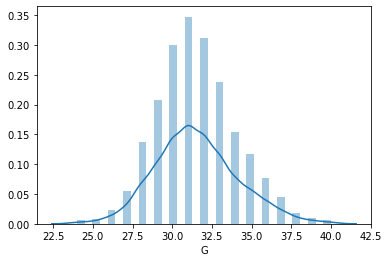

In [20]:
sns.distplot(CBB_Outlier_Treatment.G);

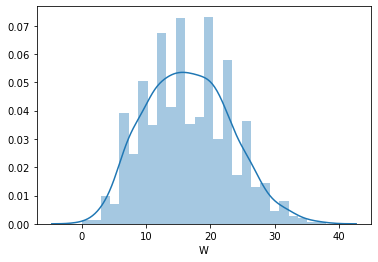

In [21]:
sns.distplot(CBB_Outlier_Treatment.W);

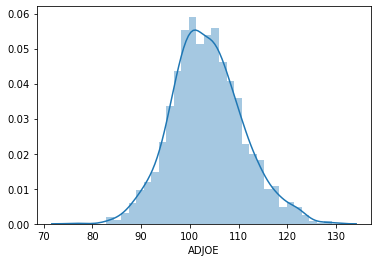

In [22]:
sns.distplot(CBB_Outlier_Treatment.ADJOE);

We can visualize each variable like this.
plots a frequency polygon superimposed on a histogram using the seaborn package.
seaborn automatically creates class intervals. The number of bins can also be manually set.

## For bivariate and univariate visualisation (diagnols will be showing univariate visualisation).

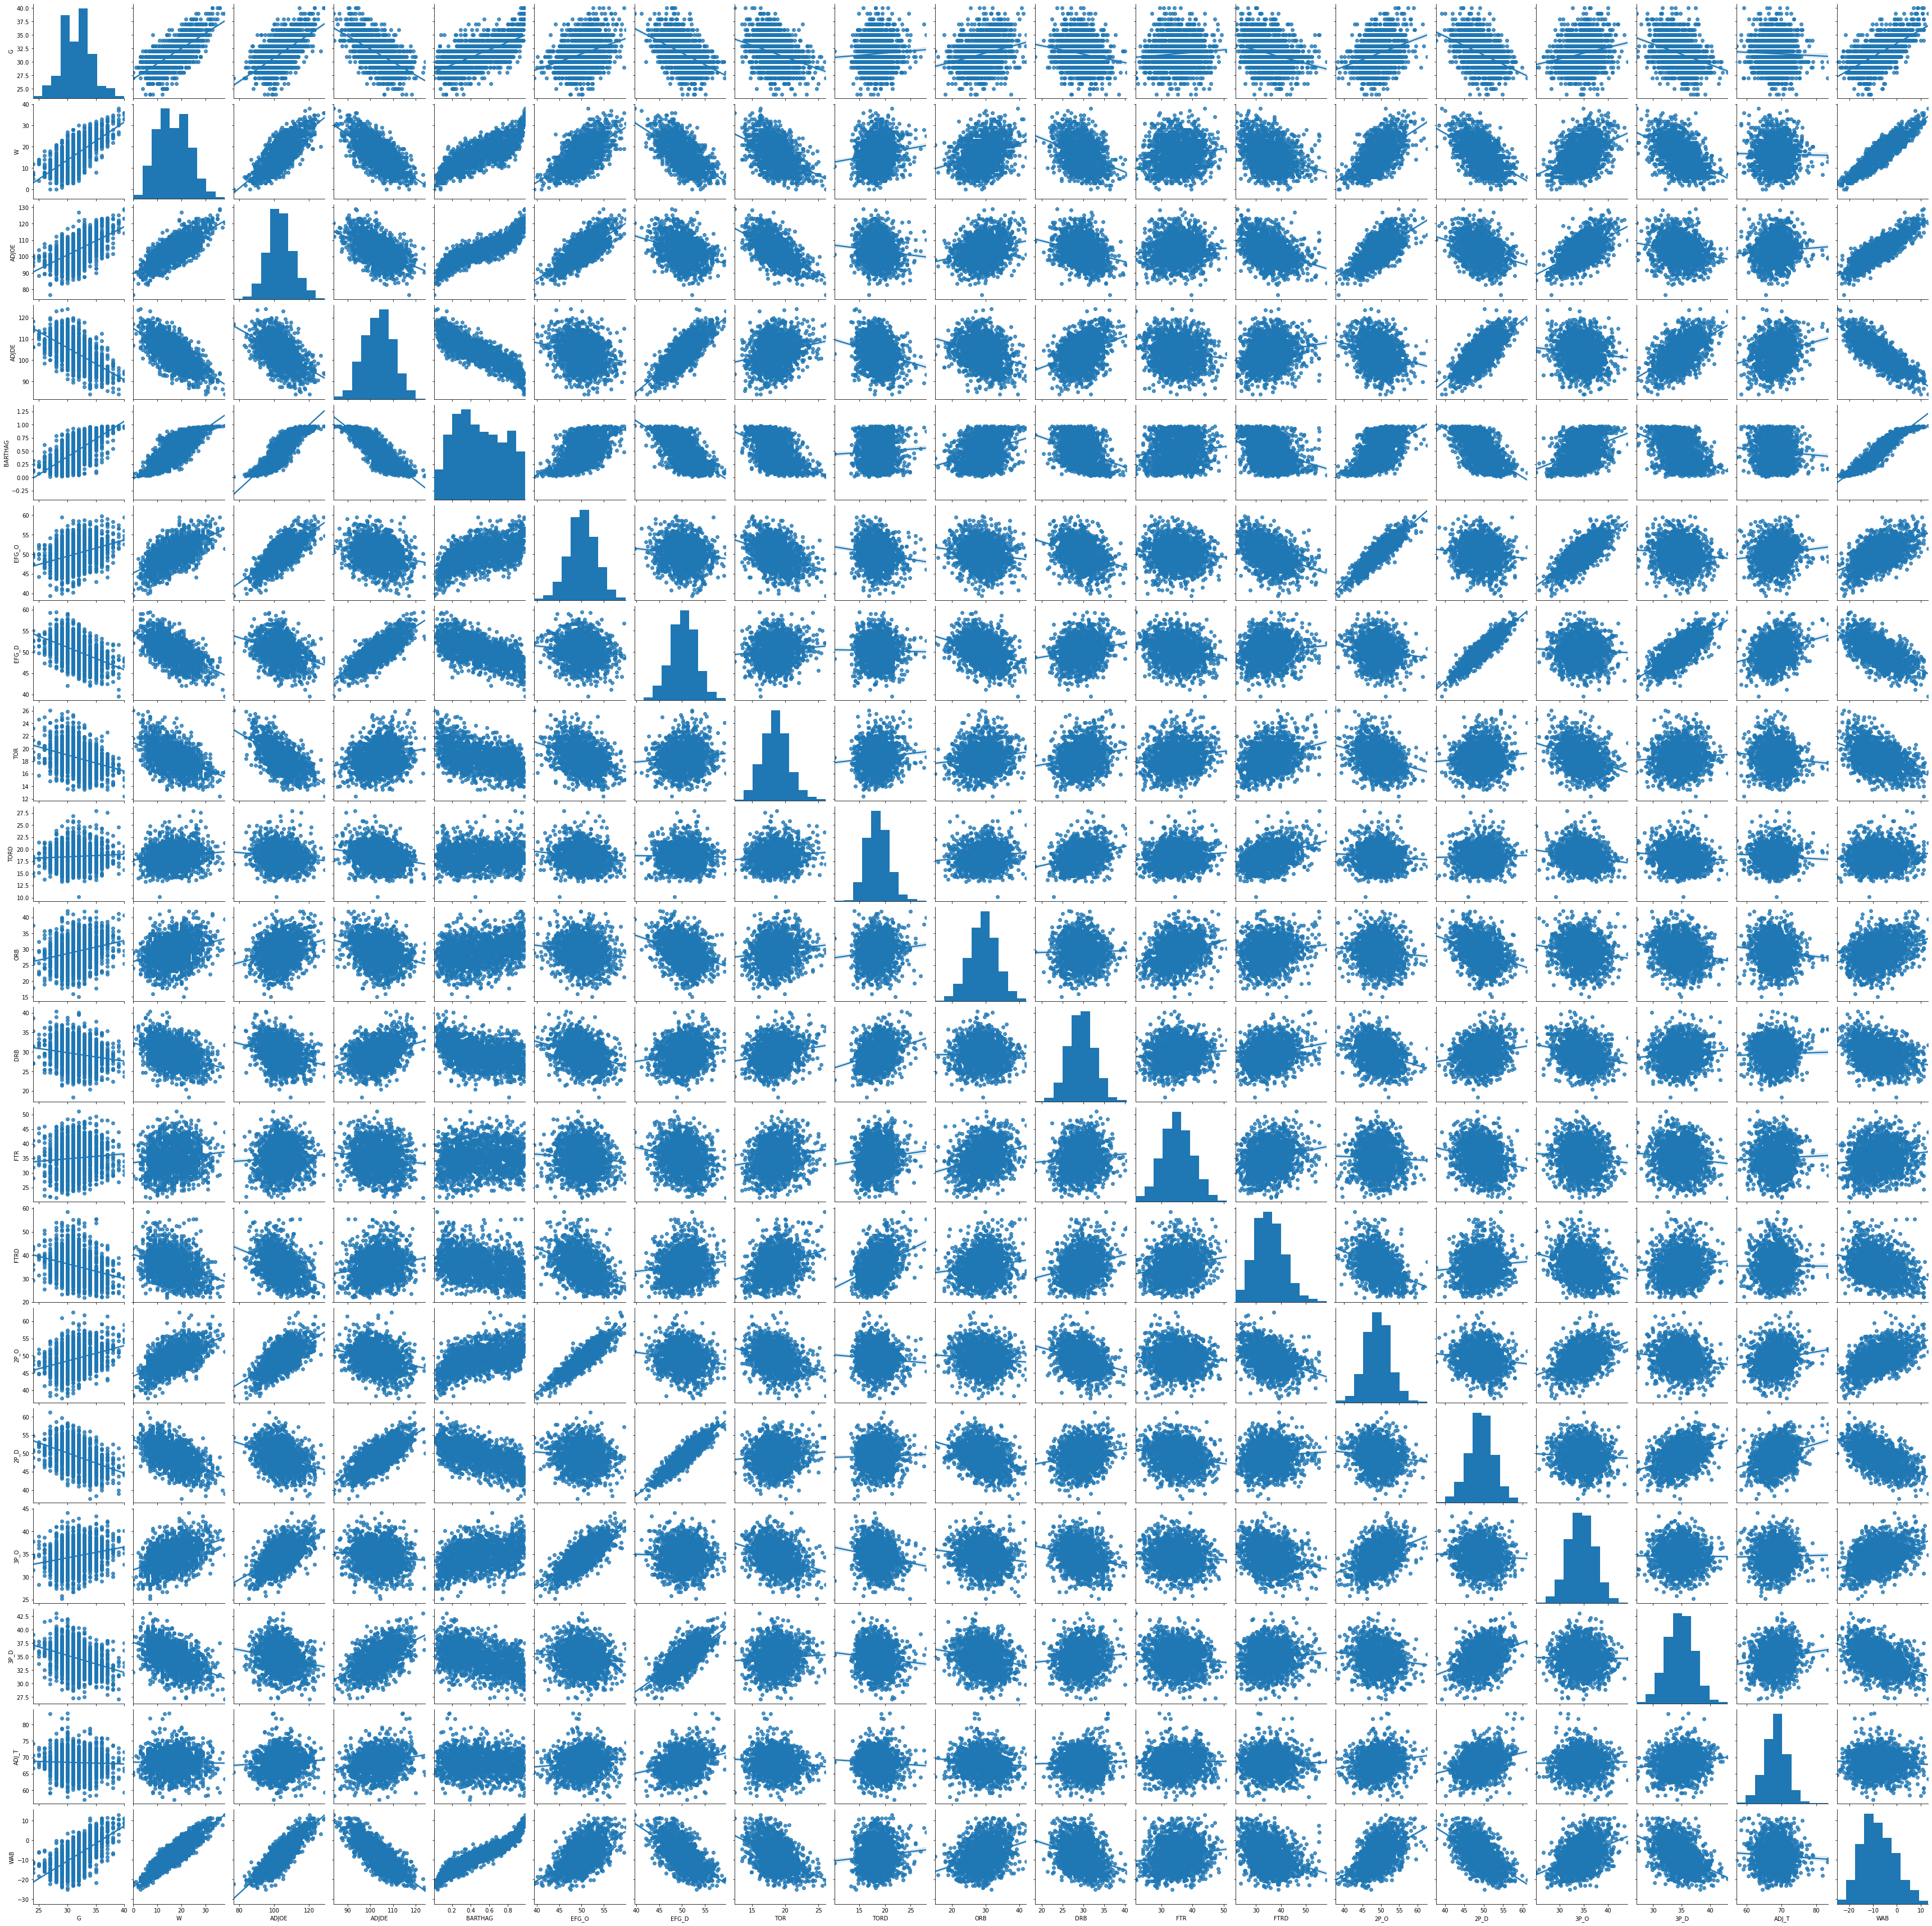

In [23]:
sns.pairplot(CBB_Outlier_Treatment, kind= "reg"); 

Analysing Correlation between two variables

The bivariate correlation, is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1.

* A closer the value towards 1 strong is a relationship and vice versa.
* A negative value stands for negative relationship.
* A positive value stands for positive relationship.
* A zero value means no relationship.

In [24]:
CBB_Outlier_Treatment.corr() # Method = Pearson

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G        1.000000  0.708838  0.613432 -0.606166  0.688059  0.346425 -0.481942   
W        0.708838  1.000000  0.754532 -0.690753  0.814512  0.617839 -0.609144   
ADJOE    0.613432  0.754532  1.000000 -0.528576  0.870686  0.732683 -0.333693   
ADJDE   -0.606166 -0.690753 -0.528576  1.000000 -0.852432 -0.221381  0.792320   
BARTHAG  0.688059  0.814512  0.870686 -0.852432  1.000000  0.543153 -0.627696   
EFG_O    0.346425  0.617839  0.732683 -0.221381  0.543153  1.000000 -0.120335   
EFG_D   -0.481942 -0.609144 -0.333693  0.792320 -0.627696 -0.120335  1.000000   
TOR     -0.336407 -0.467073 -0.601024  0.219779 -0.472329 -0.367975  0.101070   
TORD     0.065020  0.138805 -0.116231 -0.234615  0.054377 -0.144287 -0.020831   
ORB      0.261046  0.296395  0.261351 -0.294066  0.310917 -0.147990 -0.341636   
DRB     -0.184134 -0.366715 -0.266665  0.347646 -0.337804 -0.319901  0.172261   
FTR      0.090549  0.126931  0.063637 -0.125265  0.112072 -0.083514 -0.205807   
FTRD    -0.279593 -0.329245 -0.382290  0.180823 -0.327932 -0.404445  0.107161   
2P_O     0.339290  0.585806  0.646011 -0.251354  0.512045  0.893530 -0.148439   
2P_D    -0.439340 -0.529558 -0.328822  0.728488 -0.588121 -0.104079  0.907933   
3P_O     0.225821  0.432743  0.579193 -0.102715  0.386597  0.763028 -0.043770   
3P_D    -0.349726 -0.485485 -0.198275  0.564135 -0.427750 -0.100545  0.722404   
ADJ_T   -0.040433 -0.016057  0.070476  0.227852 -0.079611  0.120142  0.273412   
WAB      0.666595  0.905029  0.851663 -0.809486  0.941776  0.562904 -0.629864   

              TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
G       -0.336407  0.065020  0.261046 -0.184134  0.090549 -0.279593  0.339290   
W       -0.467073  0.138805  0.296395 -0.366715  0.126931 -0.329245  0.585806   
ADJOE   -0.601024 -0.116231  0.261351 -0.266665  0.063637 -0.382290  0.646011   
ADJDE    0.219779 -0.234615 -0.294066  0.347646 -0.125265  0.180823 -0.251354   
BARTHAG -0.472329  0.054377  0.310917 -0.337804  0.112072 -0.327932  0.512045   
EFG_O   -0.367975 -0.144287 -0.147990 -0.319901 -0.083514 -0.404445  0.893530   
EFG_D    0.101070 -0.020831 -0.341636  0.172261 -0.205807  0.107161 -0.148439   
TOR      1.000000  0.103437  0.134433  0.188585  0.161369  0.316898 -0.288945   
TORD     0.103437  1.000000  0.118496  0.289078  0.111844  0.392412 -0.079076   
ORB      0.134433  0.118496  1.000000  0.018964  0.280598  0.136233 -0.091259   
DRB      0.188585  0.289078  0.018964  1.000000  0.082964  0.235665 -0.299565   
FTR      0.161369  0.111844  0.280598  0.082964  1.000000  0.203173 -0.040561   
FTRD     0.316898  0.392412  0.136233  0.235665  0.203173  1.000000 -0.390594   
2P_O    -0.288945 -0.079076 -0.091259 -0.299565 -0.040561 -0.390594  1.000000   
2P_D     0.091686  0.027203 -0.341291  0.183057 -0.202888  0.088794 -0.119930   
3P_O    -0.333397 -0.177276 -0.143735 -0.225528 -0.093085 -0.267869  0.402768   
3P_D     0.066363 -0.106798 -0.197189  0.090050 -0.108273  0.103091 -0.138731   
ADJ_T   -0.102687 -0.065216 -0.105308  0.032497  0.039090 -0.000793  0.163304   
WAB     -0.470286  0.094765  0.332275 -0.303666  0.146079 -0.333798  0.530586   

             2P_D      3P_O      3P_D     ADJ_T       WAB  
G       -0.439340  0.225821 -0.349726 -0.040433  0.666595  
W       -0.529558  0.432743 -0.485485 -0.016057  0.905029  
ADJOE   -0.328822  0.579193 -0.198275  0.070476  0.851663  
ADJDE    0.728488 -0.102715  0.564135  0.227852 -0.809486  
BARTHAG -0.588121  0.386597 -0.427750 -0.079611  0.941776  
EFG_O   -0.104079  0.763028 -0.100545  0.120142  0.562904  
EFG_D    0.907933 -0.043770  0.722404  0.273412 -0.629864  
TOR      0.091686 -0.333397  0.066363 -0.102687 -0.470286  
TORD     0.027203 -0.177276 -0.106798 -0.065216  0.094765  
ORB     -0.341291 -0.143735 -0.197189 -0.105308  0.332275  
DRB      0.183057 -0.225528  0.090050  0.032497 -0.303666  
FTR     -0.202888 -0.093085 -0.108273  0.039090  0.146

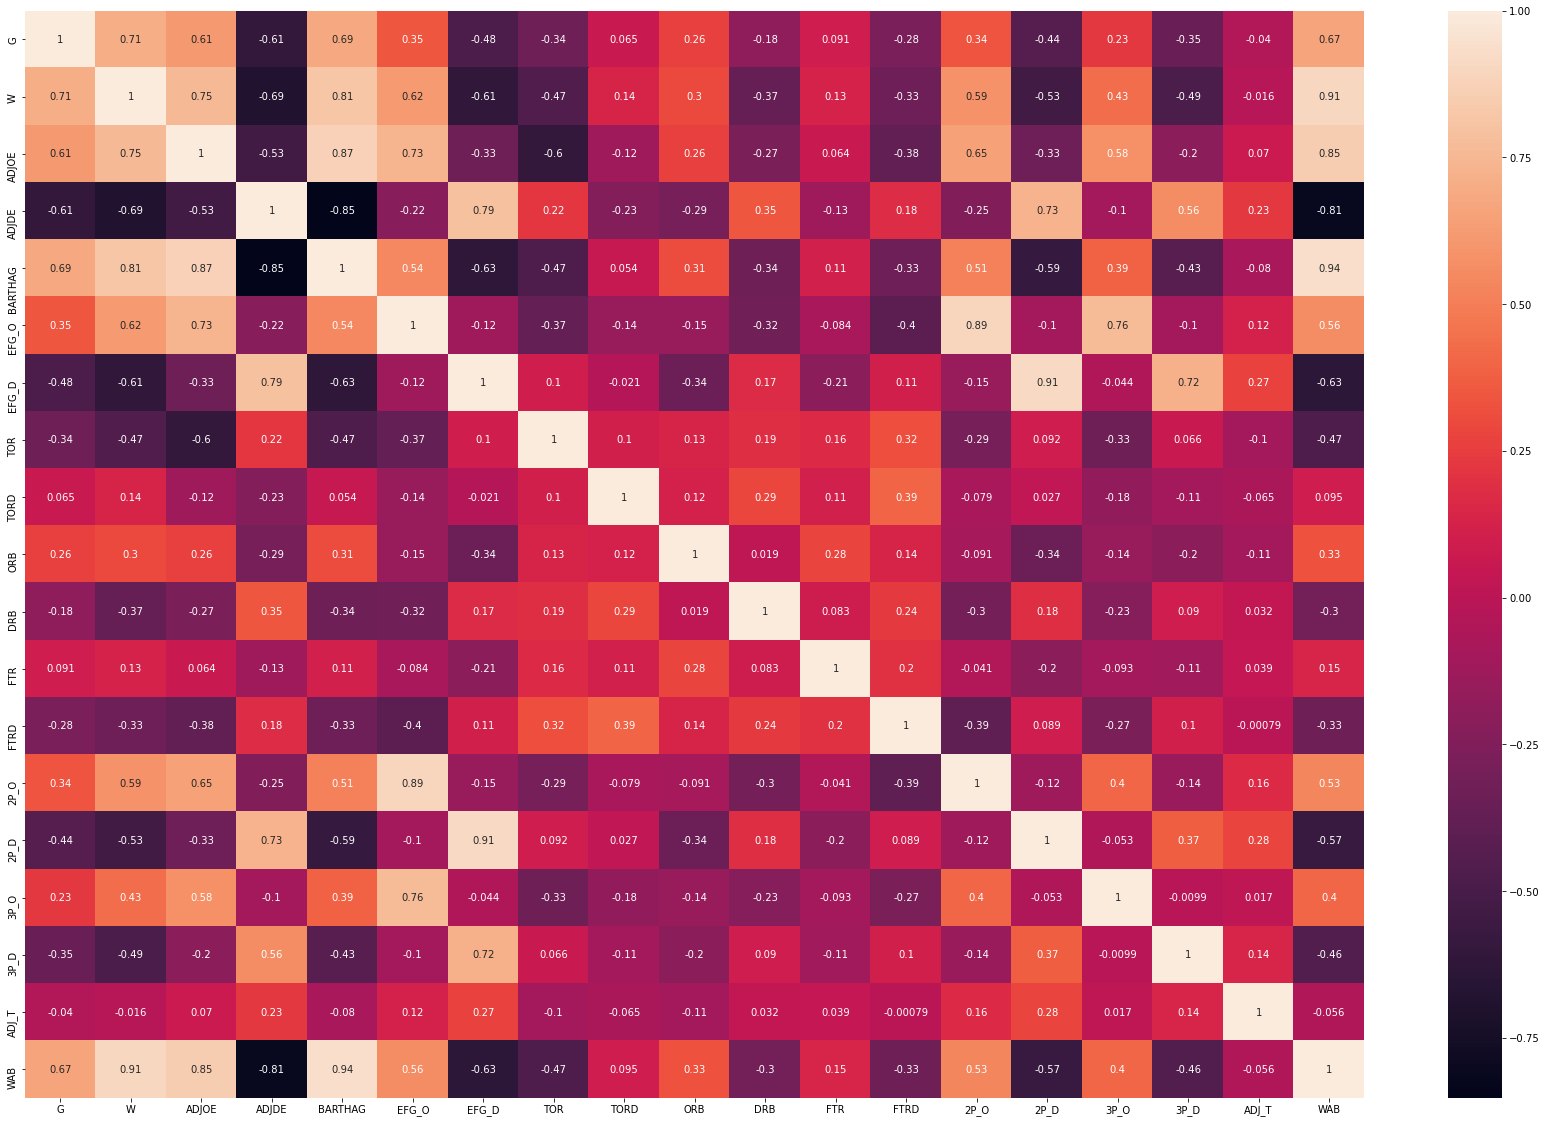

In [25]:
# A visualization relationship between variables through heatmap

plt.figure(figsize= (30,20))
sns.heatmap(CBB_Outlier_Treatment.corr(), annot = True);

## Plotting pivot table for categorical columns

In [26]:
pd.crosstab([CBB.TEAM,CBB.CONF,CBB.YEAR], CBB['W']).head(10)

W                            0   1   2   3   4   5   6   7   8   9   ...  29  \
TEAM              CONF YEAR                                          ...       
Abilene Christian Slnd 2015   0   0   0   0   0   0   0   1   0   0  ...   0   
                       2016   0   0   0   0   0   0   0   0   0   1  ...   0   
                       2017   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2018   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2019   0   0   0   0   0   0   0   0   0   0  ...   0   
Air Force         MWC  2015   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2016   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2017   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2018   0   0   0   0   0   0   0   0   0   0  ...   0   
                       2019   0   0   0   0   0   0   0   0   0   0  ...   0   

W                            30  31  32  33  34  35  36  37  38  
TEAM              CONF YEAR                                      
Abilene Christian Slnd 2015   0   0   0   0   0   0   0   0   0  
                       2016   0   0   0   0   0   0   0   0   0  
                       2017   0   0   0   0   0   0   0   0   0  
                       2018   0   0   0   0   0   0   0   0   0  
                       2019   0   0   0   0   0   0   0   0   0  
Air Force         MWC  2015   0   0   0   0   0   0   0   0   0  
                       2016   0   0   0   0   0   0   0   0   0  
                       2017   0   0   0   0   0   0   0   0   0  
                       2018   0   0   0   0   0   0   0   0   0  
                       2019   0   0   0   0   0   0   0   0   0  

[10 rows x 39 columns]

In [27]:
pd.crosstab([CBB.TEAM,CBB.CONF,CBB.YEAR], CBB['W']).tail(10)

W                         0   1   2   3   4   5   6   7   8   9   ...  29  30  \
TEAM           CONF YEAR                                          ...           
Yale           Ivy  2015   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2016   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2017   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2018   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2019   0   0   0   0   0   0   0   0   0   0  ...   0   0   
Youngstown St. Horz 2015   0   0   0   0   0   0   0   0   1   0  ...   0   0   
                    2016   0   0   0   0   0   0   0   0   0   1  ...   0   0   
                    2017   0   0   0   0   0   0   0   0   0   0  ...   0   0   
                    2018   0   0   0   0   0   0   0   0   1   0  ...   0   0   
                    2019   0   0   0   0   0   0   0   0   0   0  ...   0   0   

W                         31  32  33  34  35  36  37  38  
TEAM           CONF YEAR                                  
Yale           Ivy  2015   0   0   0   0   0   0   0   0  
                    2016   0   0   0   0   0   0   0   0  
                    2017   0   0   0   0   0   0   0   0  
                    2018   0   0   0   0   0   0   0   0  
                    2019   0   0   0   0   0   0   0   0  
Youngstown St. Horz 2015   0   0   0   0   0   0   0   0  
                    2016   0   0   0   0   0   0   0   0  
                    2017   0   0   0   0   0   0   0   0  
                    2018   0   0   0   0   0   0   0   0  
                    2019   0   0   0   0   0   0   0   0  

[10 rows x 39 columns]

Handling non-numeric(Categorical) data through One Hot Encoding:

* One-Hot-Encoding is used to create dummry variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record

In [28]:
CBB_dummies= pd.get_dummies(CBB, prefix='year', columns=['YEAR']) #This function does One-Hot-Encoding on categorical text

In [29]:
CBB_dummies.head()

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6   41.1  16.2   

   ...  3P_D  ADJ_T   WAB  POSTSEASON  SEED  year_2015  year_2016  year_2017  \
0  ...  36.2   71.7   8.6         2ND   1.0          0          1          0   
1  ...  37.5   59.3  11.3         2ND   1.0          1          0          0   
2  ...  33.2   65.9   6.9         2ND   3.0          0          0          0   
3  ...  29.7   67.5   7.0         2ND   3.0          0          0          0   
4  ...  29.0   71.5   7.7         2ND   1.0          0          0          1   

   year_2018  year_2019  
0          0          0  
1          0          0  
2          1          0  
3          0          1  
4          0          0  

[5 rows x 28 columns]

An another way of doing it through Label Encoding that has to be imported from sklearn library

In [30]:
CBB_dummies.corr() # now we can analyze the relationship between variable year wise

G         W     ADJOE     ADJDE   BARTHAG     EFG_O  \
G          1.000000  0.708838  0.613432 -0.606166  0.688059  0.346425   
W          0.708838  1.000000  0.754532 -0.690753  0.814512  0.617839   
ADJOE      0.613432  0.754532  1.000000 -0.528576  0.870686  0.732683   
ADJDE     -0.606166 -0.690753 -0.528576  1.000000 -0.852432 -0.221381   
BARTHAG    0.688059  0.814512  0.870686 -0.852432  1.000000  0.543153   
EFG_O      0.346425  0.617839  0.732683 -0.221381  0.543153  1.000000   
EFG_D     -0.481942 -0.609144 -0.333693  0.792320 -0.627696 -0.120335   
TOR       -0.336407 -0.467073 -0.601024  0.219779 -0.472329 -0.367975   
TORD       0.065020  0.138805 -0.116231 -0.234615  0.054377 -0.144287   
ORB        0.261046  0.296395  0.261351 -0.294066  0.310917 -0.147990   
DRB       -0.184134 -0.366715 -0.266665  0.347646 -0.337804 -0.319901   
FTR        0.090549  0.126931  0.063637 -0.125265  0.112072 -0.083514   
FTRD      -0.279593 -0.329245 -0.382290  0.180823 -0.327932 -0.404445   
2P_O       0.339290  0.585806  0.646011 -0.251354  0.512045  0.893530   
2P_D      -0.439340 -0.529558 -0.328822  0.728488 -0.588121 -0.104079   
3P_O       0.225821  0.432743  0.579193 -0.102715  0.386597  0.763028   
3P_D      -0.349726 -0.485485 -0.198275  0.564135 -0.427750 -0.100545   
ADJ_T     -0.040433 -0.016057  0.070476  0.227852 -0.079611  0.120142   
WAB        0.666595  0.905029  0.851663 -0.809486  0.941776  0.562904   
SEED      -0.607807 -0.612284 -0.791692  0.706046 -0.832709 -0.275137   
year_2015 -0.036429 -0.064650 -0.083949 -0.095034  0.000986 -0.183076   
year_2016 -0.017829 -0.061170  0.022166  0.025012 -0.001180 -0.054806   
year_2017  0.002959  0.037374  0.020392  0.023120 -0.001769  0.041623   
year_2018  0.008430  0.042377  0.055595  0.062915  0.002326  0.119130   
year_2019  0.042778  0.045971 -0.014173 -0.015978 -0.000362  0.076965   

              EFG_D       TOR      TORD       ORB  ...      3P_O      3P_D  \
G         -0.481942 -0.336407  0.065020  0.261046  ...  0.225821 -0.349726   
W         -0.609144 -0.467073  0.138805  0.296395  ...  0.432743 -0.485485   
ADJOE     -0.333693 -0.601024 -0.116231  0.261351  ...  0.579193 -0.198275   
ADJDE      0.792320  0.219779 -0.234615 -0.294066  ... -0.102715  0.564135   
BARTHAG   -0.627696 -0.472329  0.054377  0.310917  ...  0.386597 -0.427750   
EFG_O     -0.120335 -0.367975 -0.144287 -0.147990  ...  0.763028 -0.100545   
EFG_D      1.000000  0.101070 -0.020831 -0.341636  ... -0.043770  0.722404   
TOR        0.101070  1.000000  0.103437  0.134433  ... -0.333397  0.066363   
TORD      -0.020831  0.103437  1.000000  0.118496  ... -0.177276 -0.106798   
ORB       -0.341636  0.134433  0.118496  1.000000  ... -0.143735 -0.197189   
DRB        0.172261  0.188585  0.289078  0.018964  ... -0.225528  0.090050   
FTR       -0.205807  0.161369  0.111844  0.280598  ... -0.093085 -0.108273   
FTRD       0.107161  0.316898  0.392412  0.136233  ... -0.267869  0.103091   
2P_O      -0.148439 -0.288945 -0.079076 -0.091259  ...  0.402768 -0.138731   
2P_D       0.907933  0.091686  0.027203 -0.341291  ... -0.053283  0.373182   
3P_O      -0.043770 -0.333397 -0.177276 -0.143735  ...  1.000000 -0.009907   
3P_D       0.722404  0.066363 -0.106798 -0.197189  ... -0.009907  1.000000   
ADJ_T      0.273412 -0.102687 -0.065216 -0.105308  ...  0.017151  0.141897   
WAB       -0.629864 -0.470286  0.094765  0.332275  ...  0.403304 -0.455148   
SEED       0.386928  0.291587  0.057411 -0.314659  ... -0.220968  0.157616   
year_2015 -0.197876  0.133962  0.122899  0.193229  ... -0.072533 -0.072178   
year_2016 -0.059899 -0.102324 -0.095111  0.041563  ... -0.004670 -0.003198   
year_2017  0.045514  0.000555  0.005218 -0.019047  ...  0.054210  0.065241   
year_2018  0.131108 -0.035906 -0.033536 -0.089378  ...  0.073526  0.079902   
year_2019  0.080980  0.003705  0.000530 -0.126098  ... -0.050425 -0.069619   

              ADJ_T       WAB      SEED  year_2015  year_2016  year_2017  \
G         -0.0

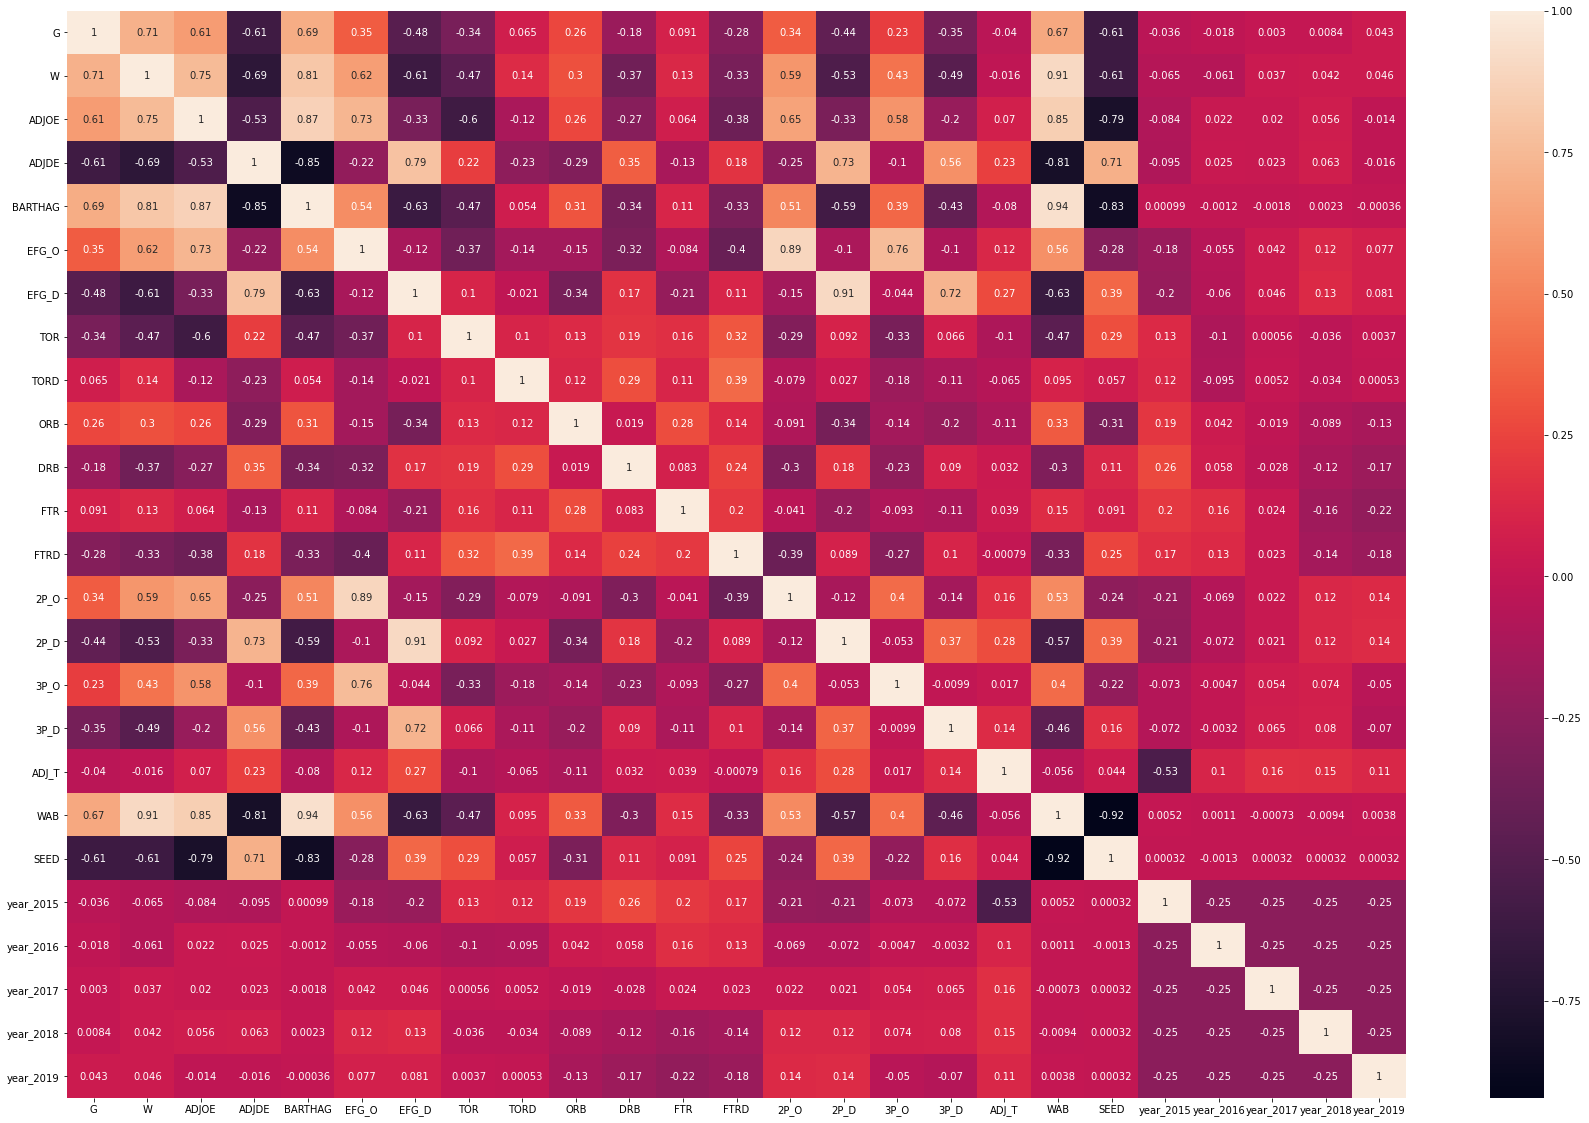

In [31]:
plt.figure(figsize= (30,20))
sns.heatmap(CBB_dummies.corr(), annot = True);

Although one major disadvantage of One hot encoding or dummies variable is that it will leads to form extra columns

Happy Learning